# GradienBoosting

## Что это такое?

**Gradient Boosting** — это метод, при котором последовательно строится цепочка деревьев (или других слабых моделей), где каждое следующее дерево учится **исправлять ошибки предыдущих**.

* На каждом шаге вычисляются остатки (*residuals*) — разницы между фактическим y и предсказанным.
* Новое дерево обучается на этих остатках, добавляя предсказания с умножением на *learning rate* $ν$.
* Итог — сумма предсказаний всех деревьев, постепенно уменьшающая ошибку.

**Важно**: модель работает постепенно и чувствительна к переобучению, поэтому нужно тщательно подбирать параметры.

## Ключевые параметры

|Параметр|	Описание|
|--------|----------|
|```n_estimators```|	Число деревьев M — шагов бустинга|
|```learning_rate (ν)```|	Шаг градиентного шага (обычно ≤0.1) — уменьшает вклад каждого нового дерева|
|```max_depth```|	Максимальная глубина каждого дерева-жителя|
|```subsample```| Параметр стохастичности: доля случайной выборки для каждого дерева (0.5–1)|
|```max_features```|	Максимальное число признаков, рассматриваемых при разбиении|
|```min_samples_split``` и ```min_samples_leaf```|	Минимум данных для разбиения и для листа|

## Пример градиентного бустинга на синтетических данных

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=X.shape[0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = GradientBoostingRegressor(learning_rate=0.05, n_estimators=75, max_depth=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
print("MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))

MSE: 0.053688047565698616 R2: 0.9005536931825572


In [37]:
X_grid = np.arange(X.min(), X.max(), 0.01)[:,np.newaxis]
y_grid = model.predict(X_grid)

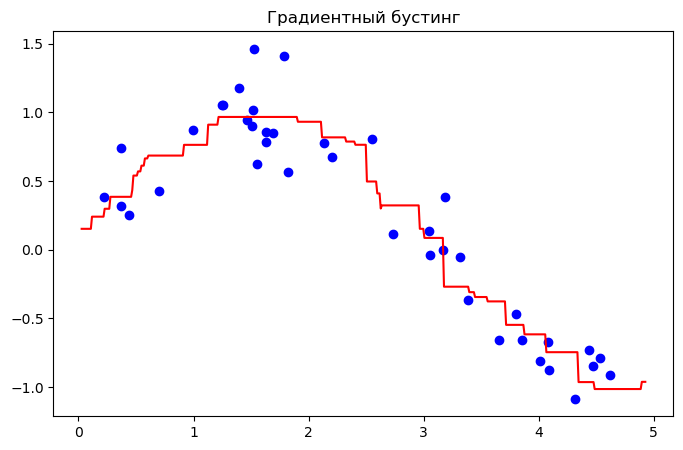

In [38]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_grid, y_grid, color='red')
plt.title("Градиентный бустинг")
plt.show()